In [ ]:
import ptyrodactyl.optics as pto
import jax 
import jax.numpy as jnp
from jaxtyping import Array, Float, Shaped, Int, Complex
import matplotlib.pyplot as plt

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
pixel_spacing_real = 200/(10**9)
collimated_beam_waist = 10/(10**3)
image_fov_x = 450/(10**6)
image_fov_y = 450/(10**6)

In [ ]:
num_pixels = image_fov_y/pixel_spacing_real

In [ ]:
xo = jnp.arange(start=-num_pixels/2, stop=num_pixels/2, step=1)
Xo, Yo = jnp.meshgrid(xo, xo)
Xo *= pixel_spacing_real
Yo *= pixel_spacing_real

<matplotlib.image.AxesImage>

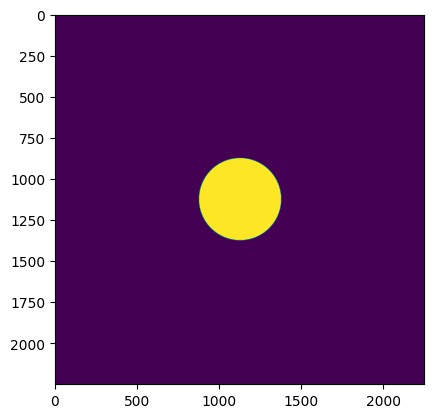

In [ ]:
Ro = ((Xo**2) + (Yo**2))**0.5
aperture_radius = 0.05/(10**3)
plt.imshow(Ro < aperture_radius)

In [ ]:
# generate test object
d = 1e-3  # the smaller this parameter the larger the spatial frequencies in the simulated object
b = 56  # topological charge (feel free to play with this number)
theta, rho = jnp.cart2pol(Xo, Yo)
t = (1 + np.sign(np.sin(b * theta + 2 * np.pi * (rho / d) ** 2))) / 2
t = t * circ(Xo, Yo, Lo) * (1 - circ(Xo, Yo, 200 * dxo)) + circ(Xo, Yo, 130 * dxo)
obj = convolve2d(t, gaussian2D(5, 5), mode="same")  # smooth edges

AttributeError: module 'jax.numpy' has no attribute 'cart2pol'